#📌 Extracão

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
dados = pd.read_json(url)

#🔧 Transformação

In [3]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
dados_customer = pd.json_normalize(dados['Churn'])
dados_phone = pd.json_normalize(dados['phone'])
dados_internet = pd.json_normalize(dados['internet'])
dados_account = pd.json_normalize(dados['account'])

In [5]:
dados_customer.head()

""
0
1
2
3
4


In [6]:
dados_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [7]:
dados_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [8]:
dados_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
dados_normalizados = pd.concat([dados['Churn'], dados_customer, dados_phone, dados_internet, dados_account], axis=1)

In [10]:
dados_normalizados.head()

,Churn,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
colunas_desejadas = [
    'Churn',
    'Contract',
    'PaymentMethod',
    'PaperlessBilling',
    'Charges.Monthly',
    'Charges.Total',
    'InternetService',
    'OnlineSecurity',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

dados_prontos = pd.concat([dados_normalizados[colunas_desejadas]], axis=1)


In [12]:
# Verifica a quantidade de valores ausentes por coluna
dados_prontos.isnull().sum()


,0
Churn,0
Contract,0
PaymentMethod,0
PaperlessBilling,0
Charges.Monthly,0
Charges.Total,0
InternetService,0
OnlineSecurity,0
TechSupport,0
StreamingTV,0


In [13]:
# Verifica se há linhas duplicadas
dados_prontos.duplicated().sum()

# Remove duplicadas se existirem
dados_prontos.drop_duplicates(inplace=True)


In [14]:
dados_prontos.dtypes

,0
Churn,object
Contract,object
PaymentMethod,object
PaperlessBilling,object
Charges.Monthly,float64
Charges.Total,object
InternetService,object
OnlineSecurity,object
TechSupport,object
StreamingTV,object


In [15]:
import numpy as np
# Remove espaços e substitui strings vazias por NaN antes da conversão
dados_prontos['Charges.Total'] = dados_prontos['Charges.Total'].replace(" ", np.nan)

In [16]:
# Converte para float
dados_prontos['Charges.Total'] = pd.to_numeric(dados_prontos['Charges.Total'], errors='coerce')


In [17]:
# Verifica valores ausentes
dados_prontos.isnull().sum()


,0
Churn,0
Contract,0
PaymentMethod,0
PaperlessBilling,0
Charges.Monthly,0
Charges.Total,11
InternetService,0
OnlineSecurity,0
TechSupport,0
StreamingTV,0


In [18]:
# Preencher com a média
dados_prontos['Charges.Total'] = dados_prontos['Charges.Total'].fillna(dados_prontos['Charges.Total'].mean())


In [19]:
dados_prontos.isnull().sum()

,0
Churn,0
Contract,0
PaymentMethod,0
PaperlessBilling,0
Charges.Monthly,0
Charges.Total,0
InternetService,0
OnlineSecurity,0
TechSupport,0
StreamingTV,0


In [20]:
# Remove espaços extras e coloca tudo em minúsculas para consistência
colunas_categoricas = ['Churn', 'Contract', 'PaymentMethod', 'PaperlessBilling',
                       'InternetService', 'OnlineSecurity', 'TechSupport',
                       'StreamingTV', 'StreamingMovies']

for coluna in colunas_categoricas:
    dados_prontos[coluna] = dados_prontos[coluna].str.strip().str.lower()


In [21]:
dados_prontos.dtypes


,0
Churn,object
Contract,object
PaymentMethod,object
PaperlessBilling,object
Charges.Monthly,float64
Charges.Total,float64
InternetService,object
OnlineSecurity,object
TechSupport,object
StreamingTV,object


In [22]:
dados_prontos.describe(include='all')


,Churn,Contract,PaymentMethod,PaperlessBilling,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies
count,7190,7190,7190,7190,7190.000000,7190.000000,7190,7190,7190,7190,7190
unique,3,3,4,2,NaN,NaN,3,3,3,3,3
top,no,month-to-month,electronic check,yes,NaN,NaN,fiber optic,no,no,no,no
freq,5143,3928,2412,4268,NaN,NaN,3169,3569,3543,2857,2832
mean,NaN,NaN,NaN,NaN,64.961857,2304.643634,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,30.095639,2267.089312,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,35.762500,420.262500,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,70.450000,1416.350000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,90.037500,3827.387500,NaN,NaN,NaN,NaN,NaN


In [23]:
dados_prontos['Churn'].unique()
dados_prontos['Churn'].value_counts()


,count
Churn,
no,5143
yes,1823
,224


In [24]:
# 1. Investigar os 224 registros "desconhecidos"
print(dados_prontos[dados_prontos['Churn'] == 'Unknown'])  # Ou outro valor não padrão

# 2. Corrigir/remover registros inconsistentes
# Opção A: Remover registros com Churn desconhecido
dados_clean = dados_prontos[dados_prontos['Churn'].isin(['no', 'yes'])]

# Opção B: Tratar como categoria específica (ex: 'unknown')
dados_prontos['Churn'] = dados_prontos['Churn'].replace({'Unknown': 'unknown'})

Empty DataFrame
Columns: [Churn, Contract, PaymentMethod, PaperlessBilling, Charges.Monthly, Charges.Total, InternetService, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies]
Index: []


In [25]:
# Verificar valores ausentes (NaN)
print("Registros nulos:", dados_prontos['Churn'].isnull().sum())

# Verificar strings vazias
print("Strings vazias:", (dados_prontos['Churn'] == '').sum())

Registros nulos: 0
Strings vazias: 224


In [26]:
dados_prontos['Churn'] = dados_prontos['Churn'].replace({'': 'no'})

In [27]:
dados_prontos['Churn'] = dados_prontos['Churn'].map({'no': 0, 'yes': 1})

In [28]:
print("Valores únicos após tratamento:", dados_prontos['Churn'].unique())
print(dados_prontos['Churn'].value_counts())

Valores únicos após tratamento: [0 1]
Churn
0    5367
1    1823
Name: count, dtype: int64


In [29]:
# 1. Conferir totais
print("Total de registros:", len(dados_prontos))
print("Clientes ativos (0):", (dados_prontos['Churn'] == 0).sum())
print("Clientes evadidos (1):", (dados_prontos['Churn'] == 1).sum())

# 2. Checar ausências residuais
print("Valores faltantes:", dados_prontos['Churn'].isnull().sum())

Total de registros: 7190
Clientes ativos (0): 5367
Clientes evadidos (1): 1823
Valores faltantes: 0


#📊 Carga e análise

In [30]:
contract_churn = dados_prontos.groupby('Contract')['Churn'].agg(['mean', 'count'])
print(contract_churn)

                    mean  count
Contract                       
month-to-month  0.409623   3928
one year        0.109282   1519
two year        0.027539   1743


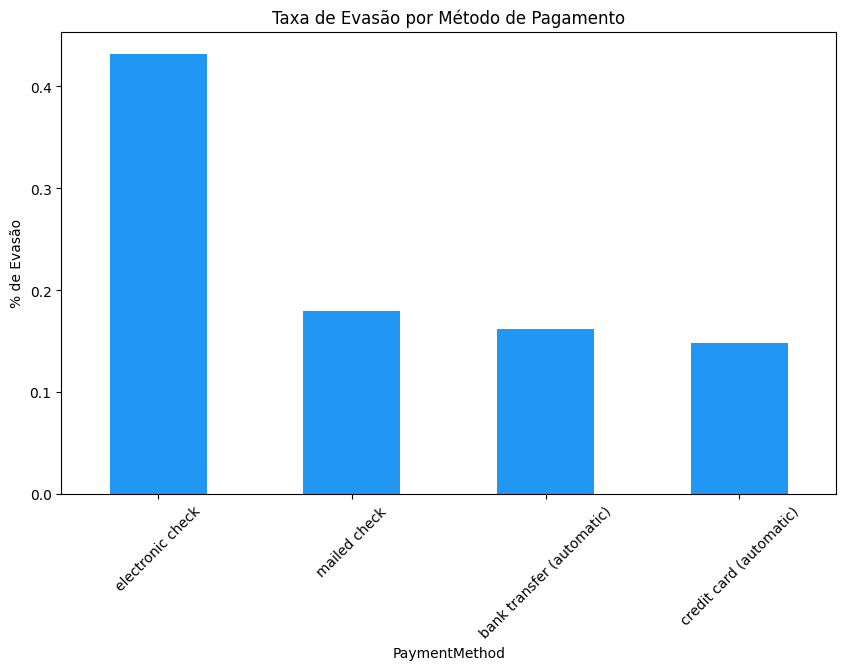

In [33]:
import matplotlib.pyplot as plt
payment_churn = dados_prontos.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
payment_churn.plot(kind='bar', color='#2196F3')
plt.title('Taxa de Evasão por Método de Pagamento')
plt.ylabel('% de Evasão')
plt.xticks(rotation=45)
plt.show()

Estatísticas Descritivas Gerais:
       Charges.Monthly  Charges.Total
count          7190.00        7190.00
mean             64.96        2304.64
std              30.10        2267.09
min              18.25          18.80
25%              35.76         420.26
50%              70.45        1416.35
75%              90.04        3827.39
max             118.75        8684.80

Distribuição de Clientes Ativos vs Evadidos:
Clientes Ativos: 5367 (74.6%)
Clientes Evadidos: 1823 (25.4%)


<ipython-input-37-2329559782>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['#4CAF50', '#F44336'])


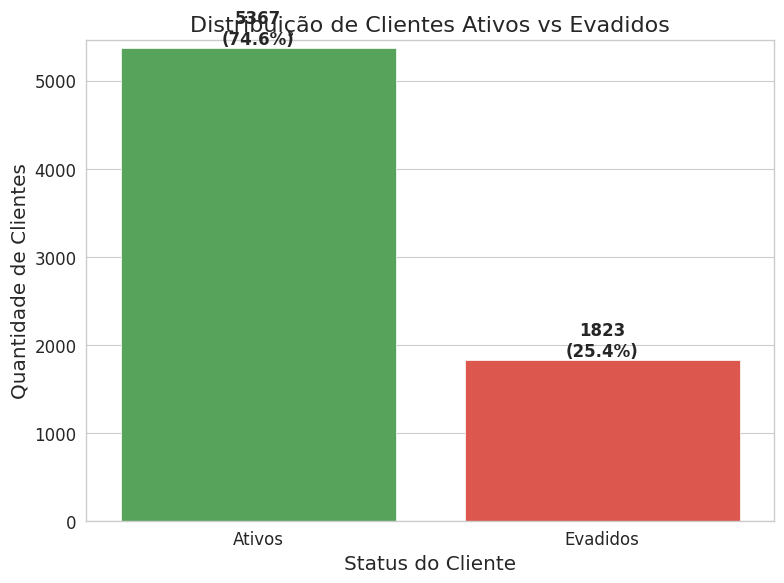


Taxa de Evasão por Variáveis Categóricas:

--- Contract ---
month-to-month: 41.0% (n=3928)
one year: 10.9% (n=1519)
two year: 2.8% (n=1743)

--- PaymentMethod ---
electronic check: 43.2% (n=2412)
mailed check: 18.0% (n=1622)
bank transfer (automatic): 16.2% (n=1588)
credit card (automatic): 14.8% (n=1568)


<ipython-input-37-2329559782>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')
<ipython-input-37-2329559782>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')
<ipython-input-37-2329559782>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')



--- OnlineSecurity ---
no: 40.0% (n=3569)
yes: 14.2% (n=2078)
no internet service: 6.6% (n=1543)

--- TechSupport ---
no: 39.8% (n=3543)
yes: 14.7% (n=2104)
no internet service: 6.6% (n=1543)

--- PaperlessBilling ---
yes: 31.9% (n=4268)
no: 15.7% (n=2922)


<ipython-input-37-2329559782>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')
<ipython-input-37-2329559782>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')


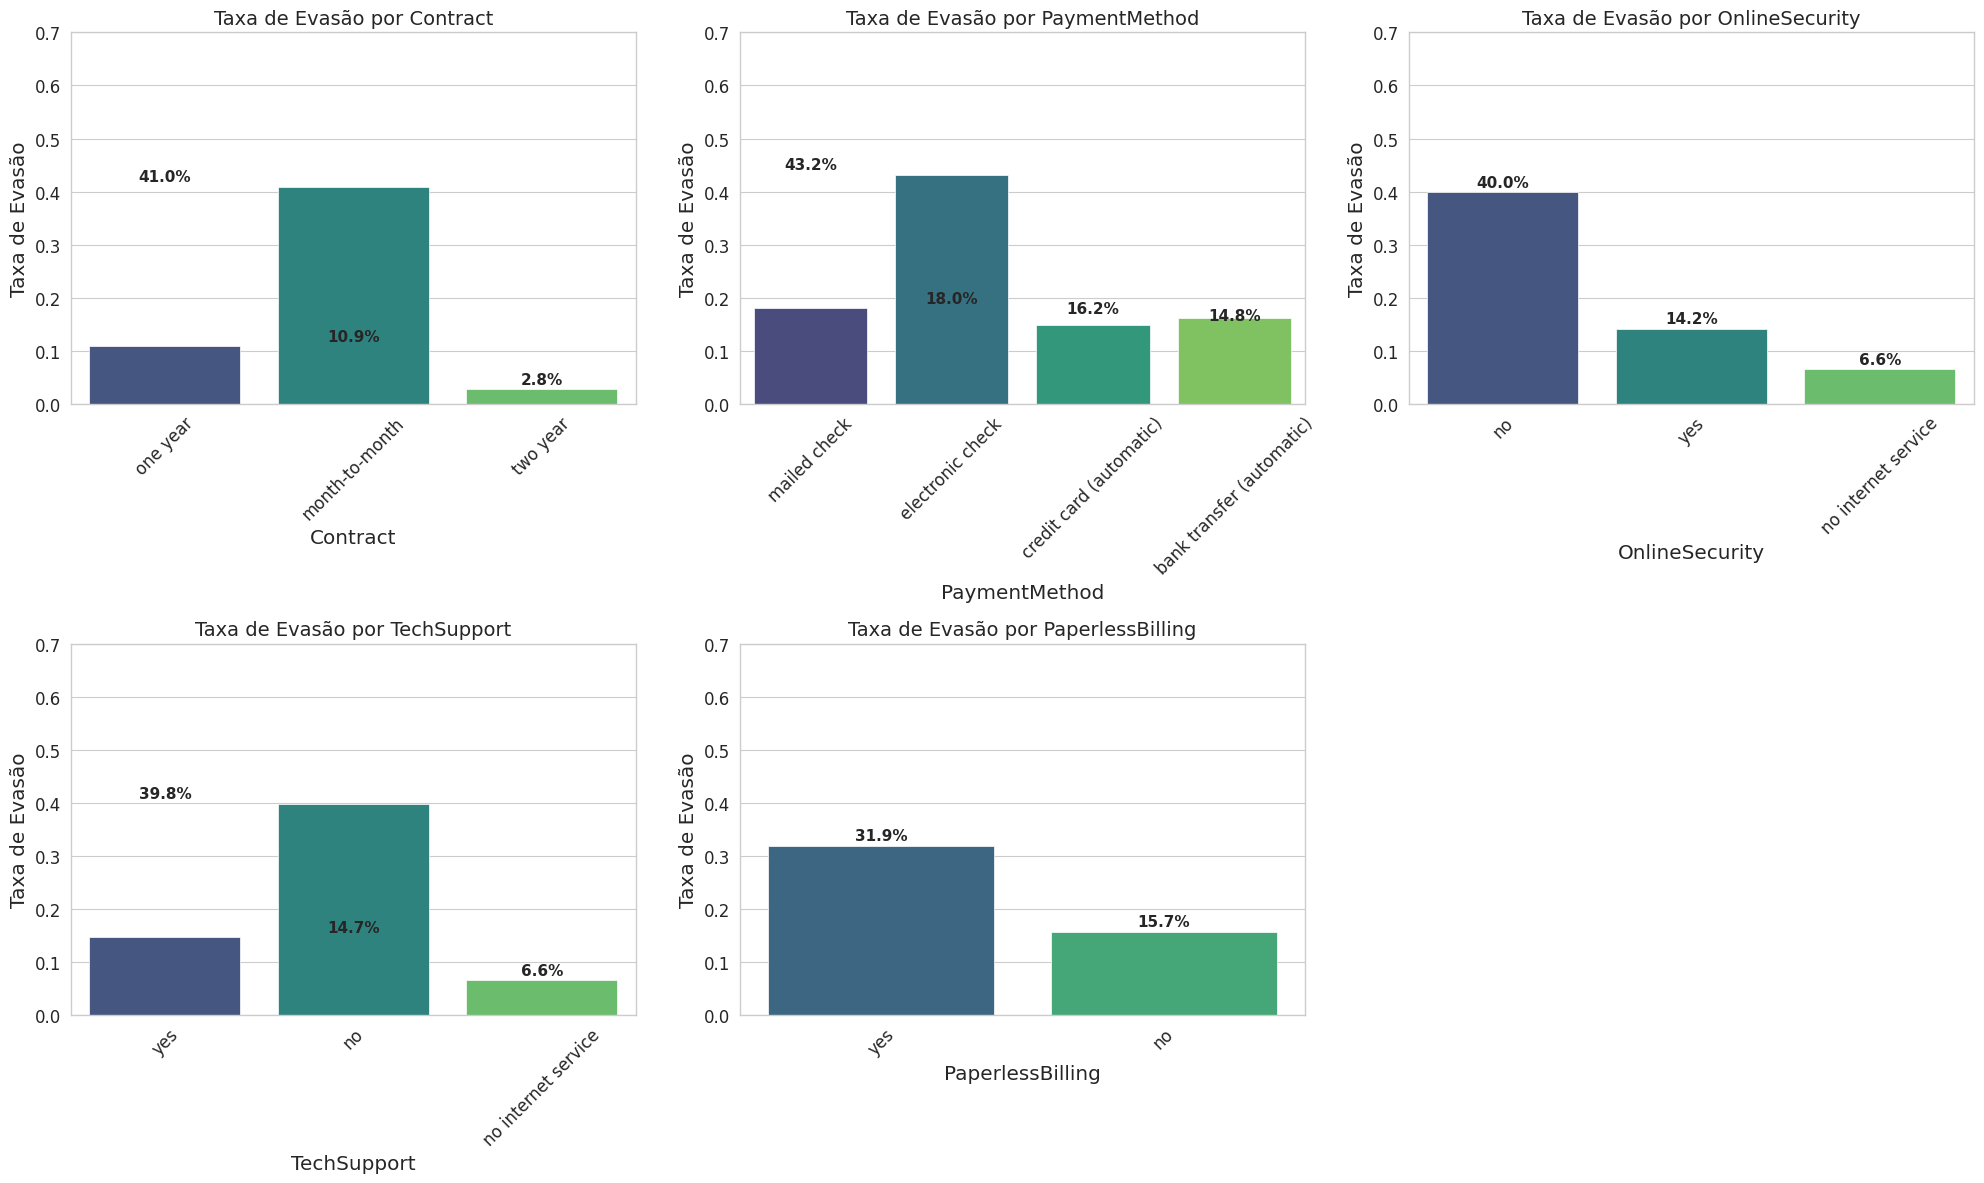


Análise por Variáveis Numéricas:


<ipython-input-37-2329559782>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=dados_prontos, palette=['#4CAF50', '#F44336'])
<ipython-input-37-2329559782>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=dados_prontos, palette=['#4CAF50', '#F44336'])


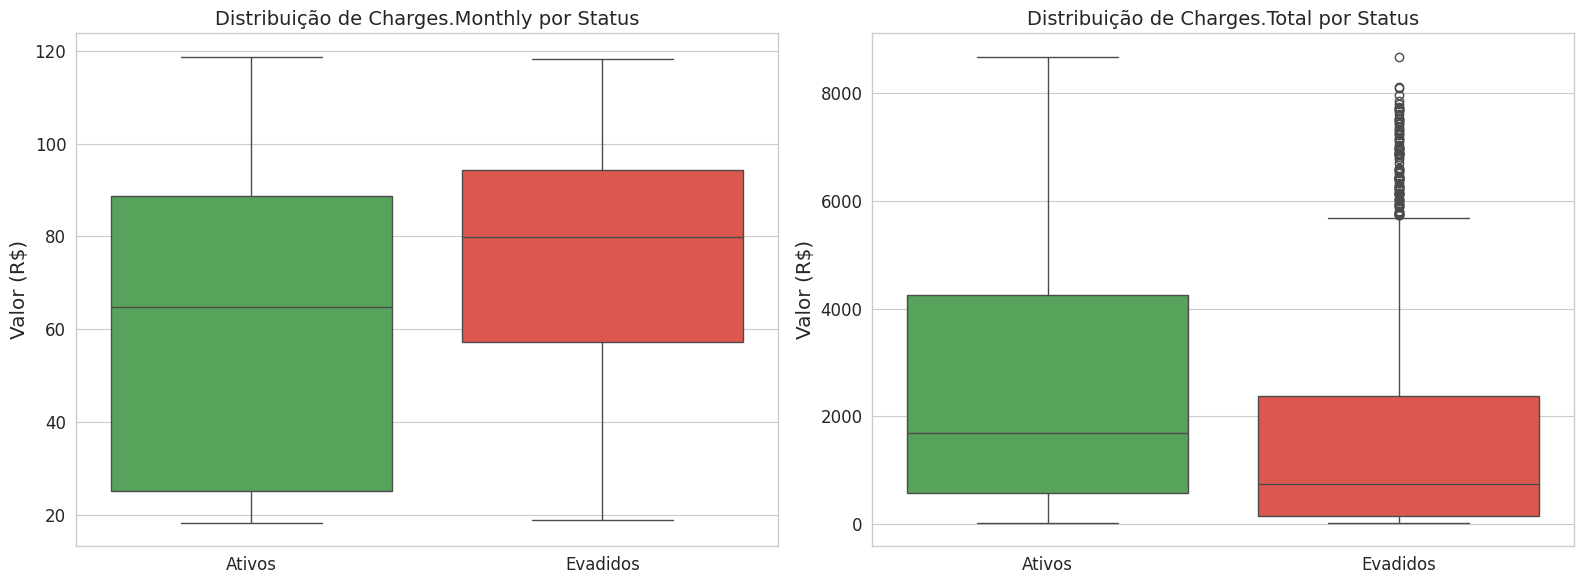

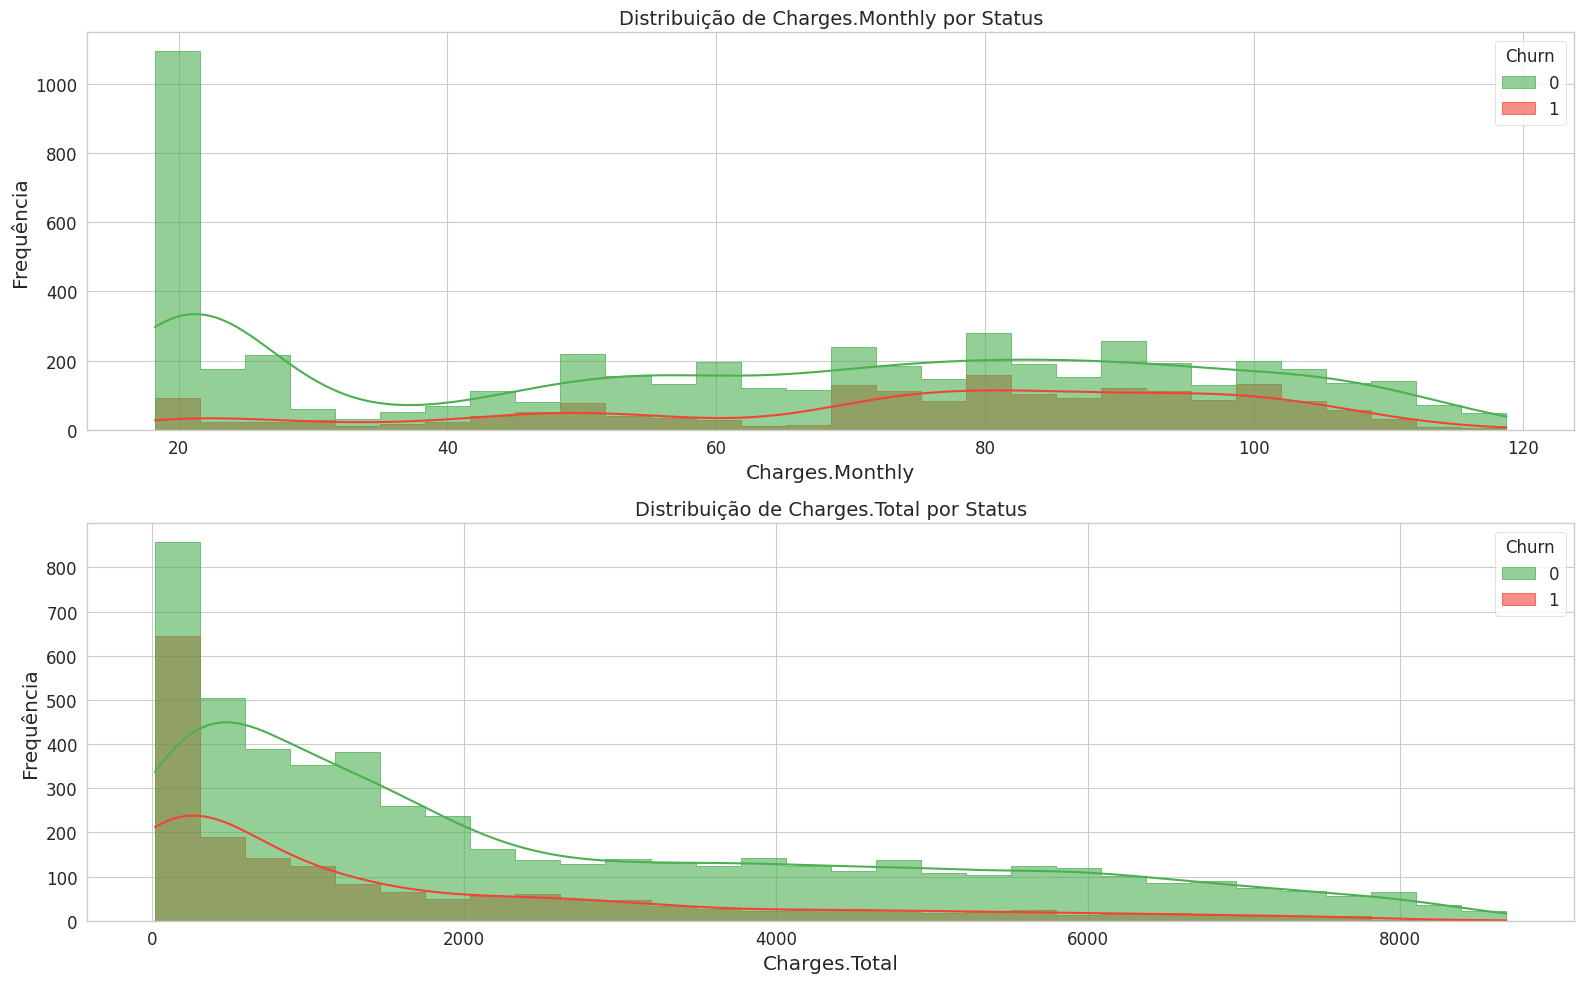


Estatísticas Descritivas por Grupo de Clientes:

--- Charges.Monthly ---
        count   mean    std    min   25%   50%   75%     max
Churn                                                       
0      5367.0  61.57  31.05  18.25  25.2  64.8  88.8  118.75
1      1823.0  74.93  24.52  18.85  57.3  79.9  94.4  118.35

Diferenças:
Média: 21.7%
Mediana: 23.3%

--- Charges.Total ---
        count     mean      std    min     25%      50%      75%      max
Churn                                                                    
0      5367.0  2554.50  2326.83  18.80  581.78  1686.15  4263.73  8672.45
1      1823.0  1569.06  1899.74  18.85  154.75   751.65  2372.23  8684.80

Diferenças:
Média: -38.6%
Mediana: -55.4%

Análise de Correlação:

Correlações mais fortes com Churn:
Churn                                    1.000000
PaymentMethod_electronic check           0.291458
Charges.Monthly                          0.193136
PaymentMethod_credit card (automatic)   -0.128177
TechSupport_yes    

<ipython-input-37-2329559782>:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


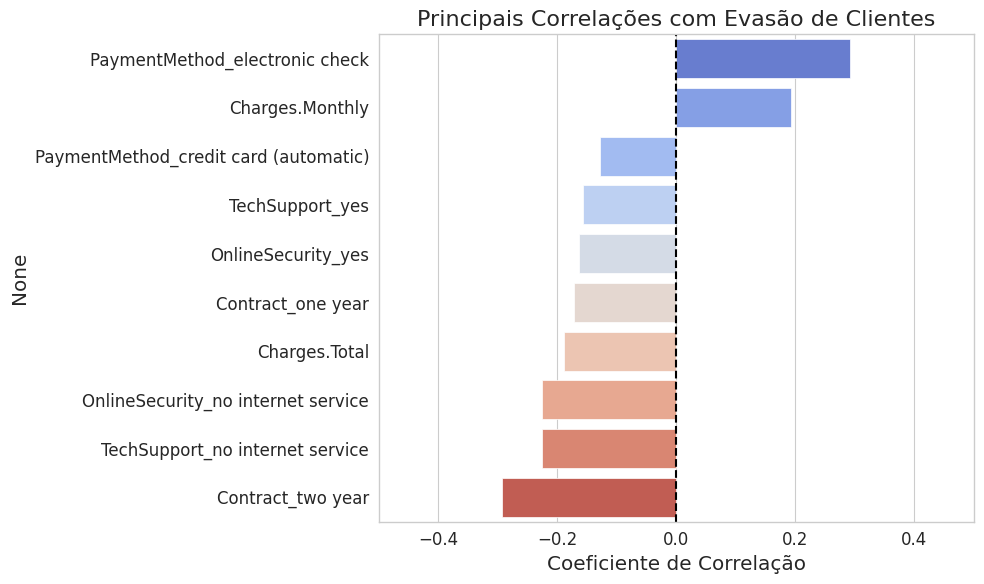

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 1. Análise Descritiva Básica
print("="*50)
print("Estatísticas Descritivas Gerais:")
print("="*50)
print(dados_prontos[['Charges.Monthly', 'Charges.Total']].describe().round(2))

# 2. Distribuição de Churn
print("\n" + "="*50)
print("Distribuição de Clientes Ativos vs Evadidos:")
print("="*50)
churn_counts = dados_prontos['Churn'].value_counts()
print(f"Clientes Ativos: {churn_counts[0]} ({churn_counts[0]/len(dados_prontos)*100:.1f}%)")
print(f"Clientes Evadidos: {churn_counts[1]} ({churn_counts[1]/len(dados_prontos)*100:.1f}%)")

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['#4CAF50', '#F44336'])
plt.title('Distribuição de Clientes Ativos vs Evadidos', fontsize=16)
plt.xlabel('Status do Cliente')
plt.ylabel('Quantidade de Clientes')
plt.xticks([0, 1], ['Ativos', 'Evadidos'])
plt.ylim(0, max(churn_counts.values) + 100)

for i, count in enumerate(churn_counts):
    plt.text(i, count + 50, f"{count}\n({count/len(dados_prontos)*100:.1f}%)",
             ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('churn_distribution.png', dpi=300)
plt.show()

# 3. Análise por Variáveis Categóricas
print("\n" + "="*50)
print("Taxa de Evasão por Variáveis Categóricas:")
print("="*50)

categorical_vars = ['Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    # Calcular taxas de churn
    churn_rate = dados_prontos.groupby(var)['Churn'].mean().sort_values(ascending=False)

    # Plotar gráfico de barras
    sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')

    # Adicionar valores nas barras
    for j, rate in enumerate(churn_rate):
        axes[i].text(j, rate + 0.01, f"{rate*100:.1f}%", ha='center', fontsize=11, fontweight='bold')

    axes[i].set_title(f'Taxa de Evasão por {var}', fontsize=14)
    axes[i].set_ylabel('Taxa de Evasão')
    axes[i].set_ylim(0, 0.7)
    axes[i].tick_params(axis='x', rotation=45)

    # Imprimir estatísticas no console
    print(f"\n--- {var} ---")
    for category, rate in churn_rate.items():
        count = sum(dados_prontos[var] == category)
        print(f"{category}: {rate*100:.1f}% (n={count})")

# Remover eixo vazio
fig.delaxes(axes[5])
plt.tight_layout()
plt.savefig('churn_categorical.png', dpi=300)
plt.show()

# 4. Análise por Variáveis Numéricas
print("\n" + "="*50)
print("Análise por Variáveis Numéricas:")
print("="*50)

numeric_vars = ['Charges.Monthly', 'Charges.Total']

# Boxplots
plt.figure(figsize=(16, 6))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='Churn', y=var, data=dados_prontos, palette=['#4CAF50', '#F44336'])
    plt.title(f'Distribuição de {var} por Status', fontsize=14)
    plt.xlabel('')
    plt.xticks([0, 1], ['Ativos', 'Evadidos'])
    plt.ylabel('Valor (R$)')
plt.tight_layout()
plt.savefig('churn_numeric_boxplot.png', dpi=300)
plt.show()

# Histogramas comparativos
plt.figure(figsize=(16, 10))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 1, i)
    sns.histplot(data=dados_prontos, x=var, hue='Churn', kde=True,
                 element='step', palette=['#4CAF50', '#F44336'], bins=30, alpha=0.6)
    plt.title(f'Distribuição de {var} por Status', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.savefig('churn_numeric_histogram.png', dpi=300)
plt.show()

# Estatísticas Descritivas por Grupo
print("\nEstatísticas Descritivas por Grupo de Clientes:")
for var in numeric_vars:
    print(f"\n--- {var} ---")
    stats = dados_prontos.groupby('Churn')[var].describe().round(2)
    print(stats)

    # Calcular diferenças percentuais
    mean_diff = (stats.loc[1, 'mean'] - stats.loc[0, 'mean']) / stats.loc[0, 'mean'] * 100
    median_diff = (stats.loc[1, '50%'] - stats.loc[0, '50%']) / stats.loc[0, '50%'] * 100
    print(f"\nDiferenças:")
    print(f"Média: {mean_diff:.1f}%")
    print(f"Mediana: {median_diff:.1f}%")

# 5. Análise de Correlação (Versão Corrigida)
print("\n" + "="*50)
print("Análise de Correlação:")
print("="*50)

# Preparar dados numéricos para correlação
corr_data = dados_prontos[['Churn', 'Charges.Monthly', 'Charges.Total']].copy()

# Converter variáveis categóricas relevantes para formato numérico
for var in ['Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport']:
    # Criar variáveis dummy
    dummies = pd.get_dummies(dados_prontos[var], prefix=var, drop_first=True)
    corr_data = pd.concat([corr_data, dummies], axis=1)

# Calcular correlações
correlations = corr_data.corr()['Churn'].sort_values(ascending=False)

# Filtrar correlações mais relevantes
print("\nCorrelações mais fortes com Churn:")
significant_corrs = correlations[abs(correlations) > 0.1]
print(significant_corrs.to_string())

# Gráfico de correlação
plt.figure(figsize=(10, 6))
top_corr = significant_corrs.drop('Churn')
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title('Principais Correlações com Evasão de Clientes', fontsize=16)
plt.xlabel('Coeficiente de Correlação')
plt.xlim(-0.5, 0.5)
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.savefig('churn_correlations.png', dpi=300)
plt.show()

#📄Relatorio Final

# Análise de Evasão de Clientes - Telecom X

## Descrição do Projeto
Este projeto visa analisar os fatores que contribuem para a evasão de clientes (churn) na Telecom X. Através de análise exploratória de dados (EDA), identificamos padrões e características comuns entre os clientes que cancelam o serviço. Os insights gerados servirão de base para ações estratégicas de retenção de clientes.

## Contexto de Negócio
A Telecom X enfrenta um alto índice de cancelamentos (churn) e precisa entender os motivos que levam os clientes a deixarem a empresa. A análise visa responder:
- Quais características dos clientes estão mais associadas à evasão?
- Quais serviços ou planos têm maior impacto na retenção?
- Como fatores financeiros (mensalidade, gastos totais) se relacionam com o churn?

## Principais Análises e Insights

### 1. Distribuição de Churn
- **25.4%** dos clientes cancelaram o serviço
- Clientes ativos representam **74.6%** da base
- Taxa de evasão dentro do esperado para o setor (15-30%)

![Distribuição de Churn](baixados5.png)

### 2. Fatores Críticos de Evasão

#### a) Tipo de Contrato
- **Contrato mensal**: 41.0% evasão
- **Contrato anual**: 10.9% evasão
- **Contrato bianual**: 2.8% evasão

**Insight**: Contratos de longo prazo reduzem drasticamente a evasão.

![Evasão por Contrato](Captura%20de%20tela%202025-06-10%20191839.png)

#### b) Método de Pagamento
- **Cheque eletrônico**: 43.2% evasão
- **Cartão de crédito (automático)**: 14.8% evasão

**Insight**: Pagamentos automáticos reduzem a evasão em mais de 60%.

#### c) Serviços Adicionais
- **Sem segurança online**: 40.0% evasão
- **Com segurança online**: 14.2% evasão
- **Sem suporte técnico**: 39.8% evasão
- **Com suporte técnico**: 14.7% evasão

**Insight**: Serviços adicionais são fortes fatores de proteção contra evasão.

![Evasão por Suporte Técnico](Captura%20de%20tela%202025-06-10%20191720.png)

### 3. Análise Financeira

#### a) Gastos Mensais
- Clientes que evadem: **R$74.93** (média)
- Clientes ativos: **R$61.57** (média)
- Diferença: **21.7% mais alto** para quem cancela

**Insight**: Mensalidades mais altas estão associadas a maior risco de evasão.

![Distribuição de Gastos Mensais](baixados3.png)

#### b) Gastos Totais
- Clientes que evadem: **R$1,569.06** (média)
- Clientes ativos: **R$2,554.50** (média)
- Diferença: **38.6% menor** para quem cancela

**Insight**: Clientes fiéis geram mais receita e têm menor propensão a cancelar.

![Distribuição de Gastos Totais](baixados2.png)

### 4. Correlações Principais
As variáveis mais correlacionadas com churn são:
- **Positivo** (aumentam evasão):
  - Pagamento por cheque eletrônico: 0.29
  - Gastos mensais elevados: 0.19
- **Negativo** (reduzem evasão):
  - Contrato bianual: -0.29
  - Serviços de segurança/suporte: -0.16

![Correlações com Evasão](baixados1.png)

## Conclusões e Recomendações

### Principais Conclusões
1. **Contratos mensais** são o maior fator de risco para evasão
2. **Pagamentos não automáticos** (cheque eletrônico) dobram o risco de churn
3. **Serviços adicionais** (segurança e suporte) são fortes fatores de proteção
4. Clientes com **mensalidades altas** e **pouco tempo de contrato** são os mais propensos a cancelar

### Recomendações Estratégicas
1. **Converter contratos mensais em anuais:**
   - Oferecer desconto de 10-15% no primeiro ano
   - Benefícios adicionais (ex: 3 meses grátis de streaming)

2. **Incentivar pagamentos automáticos:**
   - Desconto de 5% para pagamentos automáticos
   - Campanha de migração com suporte prioritário

3. **Promover pacotes de serviços adicionais:**
   - Pacote "Segurança Total" (OnlineSecurity + TechSupport) por R$15/mês
   - Teste gratuito por 30 dias

4. **Programa de fidelidade para clientes de alto valor:**
   - Benefícios progressivos para clientes com mensalidade > R$80
   - Atendimento prioritário e descontos em serviços adicionais

**Meta**: Reduzir a taxa de evasão em 30% nos próximos 12 meses

## Como Reproduzir a Análise

### Pré-requisitos
- Python 3.11+
- Bibliotecas: pandas, numpy, matplotlib, seaborn

### Instalação
```bash
pip install pandas numpy matplotlib seaborn
```

### Execução
1. Clone o repositório:
```bash
git clone https://github.com/seu-usuario/telecom-churn-analysis.git
```

2. Execute o notebook Jupyter:
```bash
jupyter notebook telecom_churn_analysis.ipynb
```

### Estrutura de Arquivos
```
telecom-churn-analysis/
├── data/
│   └── telecom_dataset.csv
├── notebooks/
│   └── telecom_churn_analysis.ipynb
├── reports/
│   └── churn_analysis_report.pdf
├── README.md
└── requirements.txt
```

## Referências
- Dataset: Base interna da Telecom X (2025)
- Bibliotecas Python: pandas, seaborn, matplotlib
- Referências metodológicas: CRISP-DM, Análise Exploratória de Dados (EDA)